# Classify elderly activities with KNN 
04-classify-elderly-activities-w-knn-in-python

## Notes
* 'ACTIVITY' contains 5 values 
** 0- Standing
** 1- Walking
** 2- Sitting
** 3- Falling
** 4- Cramps
** 5- Running


In [16]:
# Set-up libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [4]:
# Read data into dataframe
df = pd.read_csv('../00-Datasets/fall.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     16382 non-null  int64  
 1   TIME         16382 non-null  float64
 2   SL           16382 non-null  float64
 3   EEG          16382 non-null  float64
 4   BP           16382 non-null  int64  
 5   HR           16382 non-null  int64  
 6   CIRCLUATION  16382 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [6]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [7]:
df.tail()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
16377,4,9280.68,11417.00,-3021.64,36,156,654
16378,3,8479.69,9455.54,-2932.85,17,138,554
16379,2,8872.53,27449.90,-2870.00,33,156,1364
16380,4,7738.99,26466.40,-2920.24,97,156,1521
16381,3,9368.34,39149.10,-2970.00,21,196,1885


In [8]:
df.sample(6)

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
13443,5,13548.20,53197.70,-5874.52,57,288,2334
2921,0,8188.74,25571.00,-3347.00,57,139,1254
13386,5,9709.64,14763.20,-2788.68,23,148,729
15548,0,4361.75,1485.00,-434.00,13,63,115
3420,5,9695.09,22086.60,-3921.21,43,176,1313
6271,4,5796.80,7138.97,-1629.51,53,93,545


In [9]:
# Check for missing values
df.isna().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [10]:
# Check for duplicate values
df.duplicated().sum()

1

In [12]:
df[df.duplicated()==True]

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
11317,2,11619.4,114288.0,-4200.0,42,235,4905


In [14]:
# Explore tabular summary
df.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


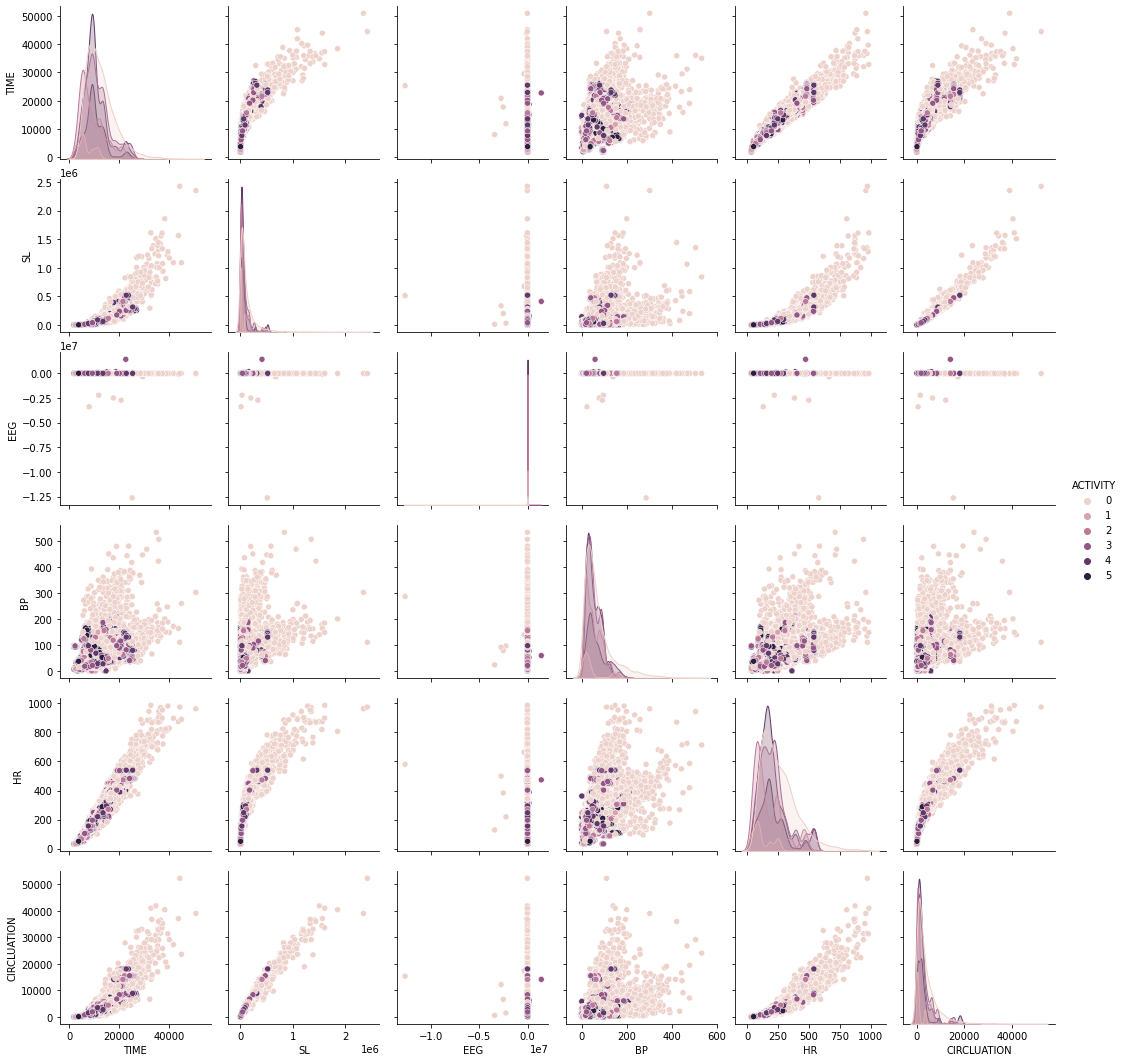

In [17]:
# Explore visual summaries
sns.pairplot(df, hue='ACTIVITY')

In [23]:
# Split data into 80% train and 20% test
X = df.drop('ACTIVITY', axis=1)
y = df['ACTIVITY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# Build model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Feed test data to model
y_predict = classifier.predict(X_test)

actual_vs_predict = pd.DataFrame({'Actual': y_test, 
                                 'Prediction': y_predict})
actual_vs_predict.head(10)

,Actual,Prediction
3180,3,4
12289,0,0
7535,0,0
598,4,4
5136,4,5
10760,5,5
3909,3,4
5619,3,3
13297,4,4
3266,4,5


In [27]:
# Evaluate model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       914
           1       0.73      0.73      0.73       105
           2       0.60      0.72      0.65       483
           3       0.58      0.64      0.61       735
           4       0.61      0.61      0.61       711
           5       0.60      0.50      0.55       329

    accuracy                           0.66      3277
   macro avg       0.66      0.66      0.66      3277
weighted avg       0.67      0.66      0.66      3277

